# Web Scraping 
## A Gentle Introduction

### The Problem


- Visit the NIST Statistical Reference Data Set [](https://www.itl.nist.gov/div898/strd/anova/SiRstv.html)
- Use the data in [Data File in Two-Column Format](https://www.itl.nist.gov/div898/strd/anova/SiRstv.dat)
- Reproduce the [image](https://www.itl.nist.gov/div898/strd/anova/SiRstv.gif)


### Manual Solution
- Download file to local drive
- Edit in text editor to remove comments
- Read using standard data table functions

Python Solution

In [1]:
import pandas
tbl = pandas.read_table('./SiRstv.dat',sep='\s+')
tbl.plot.scatter(x='Instrument', y='Resistance')

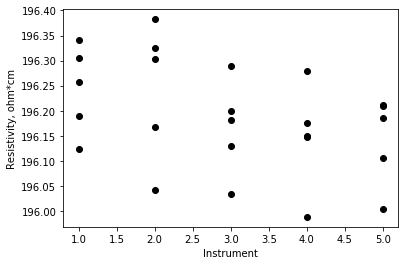

In [2]:
import matplotlib.pyplot as plt
plt.plot(tbl['Instrument'], tbl['Resistance'],'ko')
plt.ylabel('Resistivity, ohm*cm')
plt.xlabel('Instrument')
plt.show()

Next Steps
========================================================

We're a long way from web scraping. We had to download a file from the web to edit it into an appropriate format, deleting documentation. That's acceptable for a small exmaple, more interesting data will be larger and dynamic.

Our next step towards web scraping will be to read files directly from the web. 


Skipping lines

This produces an error
tbl = pandas.read_table('http://www.itl.nist.gov/div898/strd/anova/SiRstv.dat',sep='\s+')

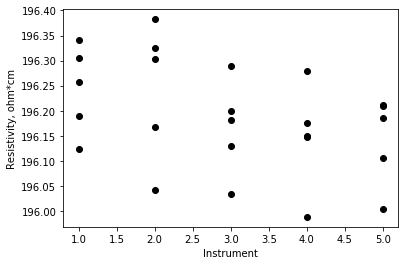

In [12]:
tbl = pandas.read_table('http://www.itl.nist.gov/div898/strd/anova/SiRstv.dat',sep='\s+',skiprows=59)
tbl.rename(columns = {'Data:':'Instrument', 'Instrument':'Resistance', 
                              'Resistance':'Blank'}, inplace = True) 
plt.plot(tbl['Instrument'], tbl['Resistance'],'ko')
plt.ylabel('Resistivity, ohm*cm')
plt.xlabel('Instrument')
plt.show()

In [14]:
fin = open('./SiRstv.dat','r')
txt = fin.read()
fin.close()
print(txt)

  Instrument       Resistance
           1         196.3052
           1         196.1240
           1         196.1890
           1         196.2569
           1         196.3403
           2         196.3042
           2         196.3825
           2         196.1669
           2         196.3257
           2         196.0422
           3         196.1303
           3         196.2005
           3         196.2889
           3         196.0343
           3         196.1811
           4         196.2795
           4         196.1748
           4         196.1494
           4         196.1485
           4         195.9885
           5         196.2119
           5         196.1051
           5         196.1850
           5         196.0052
           5         196.2090



In [15]:
import urllib
url = urllib.request.urlopen('http://www.itl.nist.gov/div898/strd/anova/SiRstv.dat')
txt = url.read()
url.close()
print(txt)

b'NIST/ITL StRD \r\nDataset Name:   SiRstv     (SiRstv.dat)\r\n\r\n\r\nFile Format:    ASCII\r\n                Certified Values   (lines 41 to 47)\r\n                Data               (lines 61 to 85) \r\n\r\n\r\nProcedure:      Analysis of Variance\r\n\r\n\r\nReference:      Ehrstein, James and Croarkin, M. Carroll.\r\n                Unpublished NIST dataset.\r\n\r\n\r\nData:           1 Factor\r\n                5 Treatments\r\n                5  Replicates/Cell\r\n                25 Observations\r\n                3 Constant Leading Digits\r\n                Lower Level of Difficulty\r\n                Observed Data\r\n\r\n\r\nModel:          6 Parameters (mu,tau_1, ... , tau_5)\r\n                y_{ij} = mu + tau_i + epsilon_{ij}\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\nCertified Values:\r\n\r\nSource of                  Sums of               Mean               \r\nVariation          df      Squares              Squares             F Statistic\r\n\r\nBetween Instrument  4 5.114626160

In [37]:
url = urllib.request.urlopen('http://www.itl.nist.gov/div898/strd/anova/SiRstv.dat')
lines = 0
while True:
    line = url.readline().decode('utf-8')
    if not line:
        break
    if re.match('Data:', line, flags=0) == None:
        lines += 1
    else:
        break
print(lines)
url.close()

16


In [24]:
import re
match = re.match('Data:', 'Data:  Instrument   Resistance\r\n', flags=0)
print(match)
match = re.match('Data:', 'Instrument   Resistance\r\n', flags=0)
print(match)
print(match != None)

<re.Match object; span=(0, 5), match='Data:'>
None
False


In [42]:
import io 
df = pandas.read_table(io.StringIO('NIST/ITL StRD \r\n'),sep='\s+', header=None)
print(df)
pandas.api.types.is_numeric_dtype(df)

          0     1
0  NIST/ITL  StRD


False

In [59]:
url = urllib.request.urlopen('http://www.itl.nist.gov/div898/strd/anova/SiRstv.dat')
lines = 0
while True:
    line = url.readline().decode('utf-8')
    bytes_read = len(line)
    if not line:
        break
    line = line.strip()
    if len(line)>0 :
        current_row = pandas.read_table(io.StringIO(line),sep='\s+', header=None)
        if not pandas.api.types.is_numeric_dtype(current_row):
            lines += 1
        else:
            print(line)            
            break
print(lines)
url.close()

51


    Data:  Instrument  Resistance
0       1    196.3052         NaN
1       1    196.1240         NaN
2       1    196.1890         NaN
3       1    196.2569         NaN
4       1    196.3403         NaN
5       2    196.3042         NaN
6       2    196.3825         NaN
7       2    196.1669         NaN
8       2    196.3257         NaN
9       2    196.0422         NaN
10      3    196.1303         NaN
11      3    196.2005         NaN
12      3    196.2889         NaN
13      3    196.0343         NaN
14      3    196.1811         NaN
15      4    196.2795         NaN
16      4    196.1748         NaN
17      4    196.1494         NaN
18      4    196.1485         NaN
19      4    195.9885         NaN
20      5    196.2119         NaN
21      5    196.1051         NaN
22      5    196.1850         NaN
23      5    196.0052         NaN
24      5    196.2090         NaN


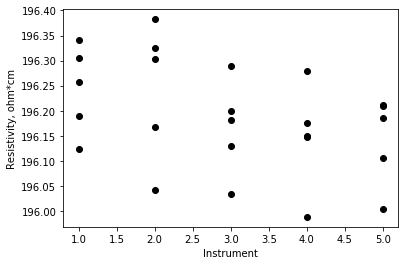

In [61]:
tbl = pandas.read_table('http://www.itl.nist.gov/div898/strd/anova/SiRstv.dat',sep='\s+',skiprows=lines)
print(tbl)
tbl.rename(columns = {'Data:':'Instrument', 'Instrument':'Resistance', 
                              'Resistance':'Blank'}, inplace = True) 
plt.plot(tbl['Instrument'], tbl['Resistance'],'ko')
plt.ylabel('Resistivity, ohm*cm')
plt.xlabel('Instrument')
plt.show()